In [1]:
import math
import warnings

from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import linear_model
from sklearn.cross_decomposition import PLSRegression

%matplotlib inline
sns.set_style('white')

# Suppress annoying harmless error.
warnings.filterwarnings(
    action="ignore",
    module="scipy",
    message="^internal gelsd"
)

## Dimensionality Reduction in Linear Regression

Having a lot of features can cause problems. 

The idea is to reduce a matrix of features $X$ into a matrix with fewer columns $R(X)$ where the expected value of $Y$ given $X$ ($E(Y|X)$) is equal to the expected value of $Y$ given $R(X)$.  


## Partial least squares regression

PLSR is iterative, for up to $n$ components.

I'll use sciKit-learn for this PLSR:

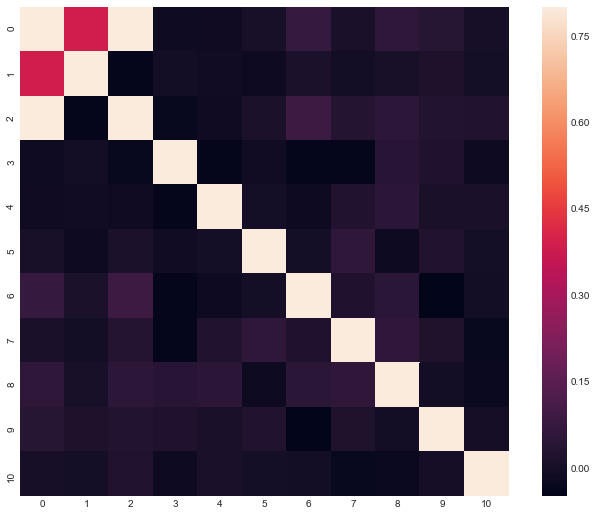

In [20]:
# Number of datapoints in outcome.
n = 1000

# Number of features.
p = 10

# Create random normally distributed data for parameters.
X = np.random.normal(size=n * p).reshape((n, p))

# Create normally distributed outcome related to parameters but with noise.
y = X[:, 0] + 2 * X[:, 1] + np.random.normal(size=n * 1) + 5


# Check out correlations. First column is the outcome.
f, ax = plt.subplots(figsize=(12, 9))
corrmat = pd.DataFrame(np.insert(X, 0, y, axis=1)).corr()

# Draw the heatmap using seaborn.
sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()

R-squared regression: 0.83211197187805
R-squared PLSR: 0.8321118556174073


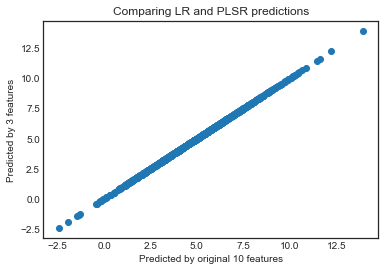

In [3]:
# Fit a linear model with all 10 features.
regr = linear_model.LinearRegression()
regr.fit(X, y)

# Save predicted values.
Y_pred = regr.predict(X)
print('R-squared regression:', regr.score(X, y))

# Fit a linear model using Partial Least Squares Regression.
# Reduce feature space to 3 dimensions.
pls1 = PLSRegression(n_components=3)

# Reduce X to R(X) and regress on y.
pls1.fit(X, y)

# Save predicted values.
Y_PLS_pred = pls1.predict(X)
print('R-squared PLSR:', pls1.score(X, y))

# Compare the predictions of the two models
plt.scatter(Y_pred,Y_PLS_pred) 
plt.xlabel('Predicted by original 10 features')
plt.ylabel('Predicted by 3 features')
plt.title('Comparing LR and PLSR predictions')
plt.show()

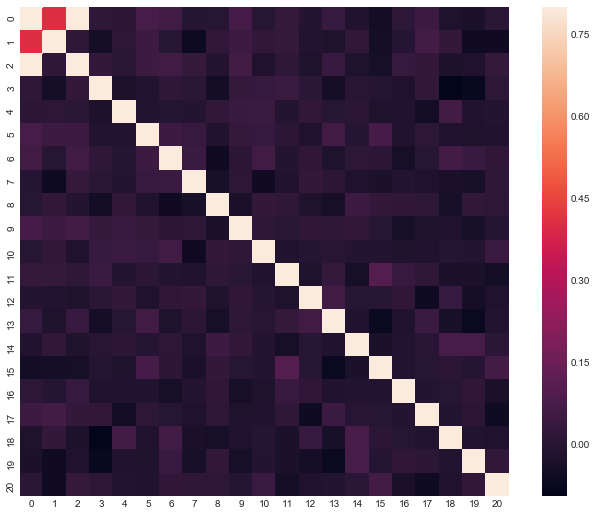

In [21]:
# The 2nd PLSR model here, with 20 features and n of 6.

# Number of datapoints in outcome.
n = 1000

# Number of features.
p = 20

# Create random normally distributed data for parameters.
X2 = np.random.normal(size=n * p).reshape((n, p))

# Create normally distributed outcome related to parameters but with noise.
y2 = X2[:, 0] + 2 * X2[:, 1] + np.random.normal(size=n * 1) + 5



# Check out correlations. First column is the outcome.
f, ax = plt.subplots(figsize=(12, 9))
corrmat = pd.DataFrame(np.insert(X2, 0, y2, axis=1)).corr()

# Draw the heatmap using seaborn.
sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()


R-squared regression: 0.8445490997753761
R-squared PLSR: 0.8445490997670407


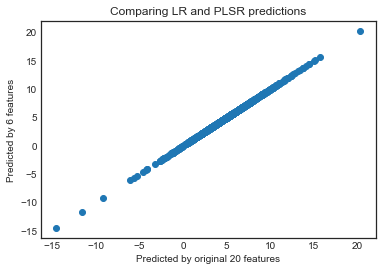

In [18]:
# Fit a linear model with all 20 features.
regr2 = linear_model.LinearRegression()
regr2.fit(X2, y2)

# Save predicted values.
Y2_pred = regr2.predict(X2)
print('R-squared regression:', regr2.score(X2, y2))

# Fit a linear model using Partial Least Squares Regression.
# Reduce feature space to 3 dimensions.
pls2 = PLSRegression(n_components=6)

# Reduce X to R(X) and regress on y.
pls2.fit(X2, y2)

# Save predicted values.
Y2_PLS_pred = pls2.predict(X2)
print('R-squared PLSR:', pls2.score(X2, y2))

# Compare the predictions of the two models
plt.scatter(Y2_pred,Y2_PLS_pred) 
plt.xlabel('Predicted by original 20 features')
plt.ylabel('Predicted by 6 features')
plt.title('Comparing LR and PLSR predictions')
plt.show()

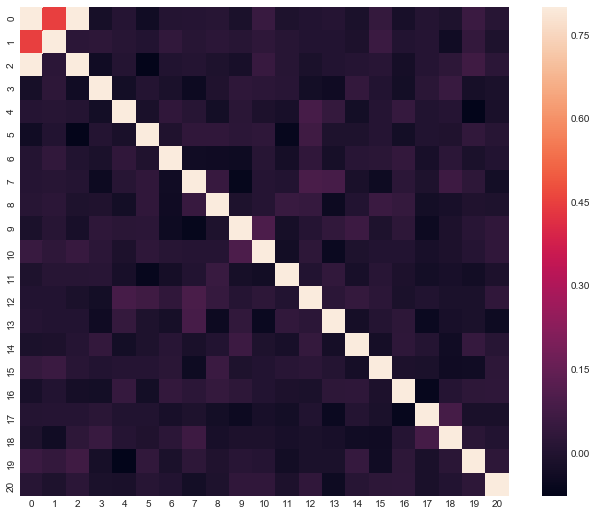

In [22]:
# The 3rd PLSR model here, with 20 componenets and n of 14.

# Number of datapoints in outcome.
n = 1000

# Number of features.
p = 20

# Create random laplace distributed data for parameters.
X2 = np.random.laplace(size=n * p).reshape((n, p))

# Create laplace distributed outcome related to parameters but with noise.
y2 = X2[:, 0] + 2 * X2[:, 1] + np.random.laplace(size=n * 1) + 5



# Check out correlations. First column is the outcome.
f, ax = plt.subplots(figsize=(12, 9))
corrmat = pd.DataFrame(np.insert(X2, 0, y2, axis=1)).corr()

# Draw the heatmap using seaborn.
sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()


R-squared regression: 0.8445490997753761
R-squared PLSR: 0.8445490997753761


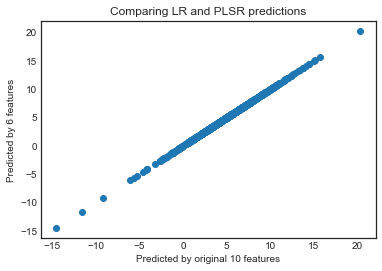

In [17]:
# Fit a linear model with all 20 features.
regr2 = linear_model.LinearRegression()
regr2.fit(X2, y2)

# Save predicted values.
Y2_pred = regr2.predict(X2)
print('R-squared regression:', regr2.score(X2, y2))

# Fit a linear model using Partial Least Squares Regression.
# Reduce feature space to 3 dimensions.
pls2 = PLSRegression(n_components=14)

# Reduce X to R(X) and regress on y.
pls2.fit(X2, y2)

# Save predicted values.
Y2_PLS_pred = pls2.predict(X2)
print('R-squared PLSR:', pls2.score(X2, y2))

# Compare the predictions of the two models
plt.scatter(Y2_pred,Y2_PLS_pred) 
plt.xlabel('Predicted by original 10 features')
plt.ylabel('Predicted by 6 features')
plt.title('Comparing LR and PLSR predictions')
plt.show()

The higher the number of components, the higher the r-squared.  THe type of randomly created data (normal vs laplace) has minimal effect on model.